In [2]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#read csv files

#financial data
financialsCSV = "Brett_Resources/finance_states.csv" 
finance_data = pd.read_csv(financialsCSV) 

#SAT scores 
SAT_CSV = "Brett_Resources/SAT_scores.csv" 
SAT_data = pd.read_csv(SAT_CSV) 

#grad rates 
grad_ratescsv = "Brett_Resources/grad_rates.csv" 
grad_rates = pd.read_csv(grad_ratescsv)

#crime rates
file='Resources - Christin/estimated_crimes.csv'
crime_rates = pd.read_csv(file)

In [4]:
#cleaning the financial data 
clean_finance = finance_data.iloc[1175:1226,[1,8,]]
clean_finance

,STATE,TOTAL_EXPENDITURE
1175,AZ,7902600
1176,AR,5350543
1177,CA,78365958
1178,CO,9557682
1179,CT,10542667
1180,DE,1975093
1181,DC,1360942
1182,FL,27277049
1183,GA,18501103
1184,HI,2521004


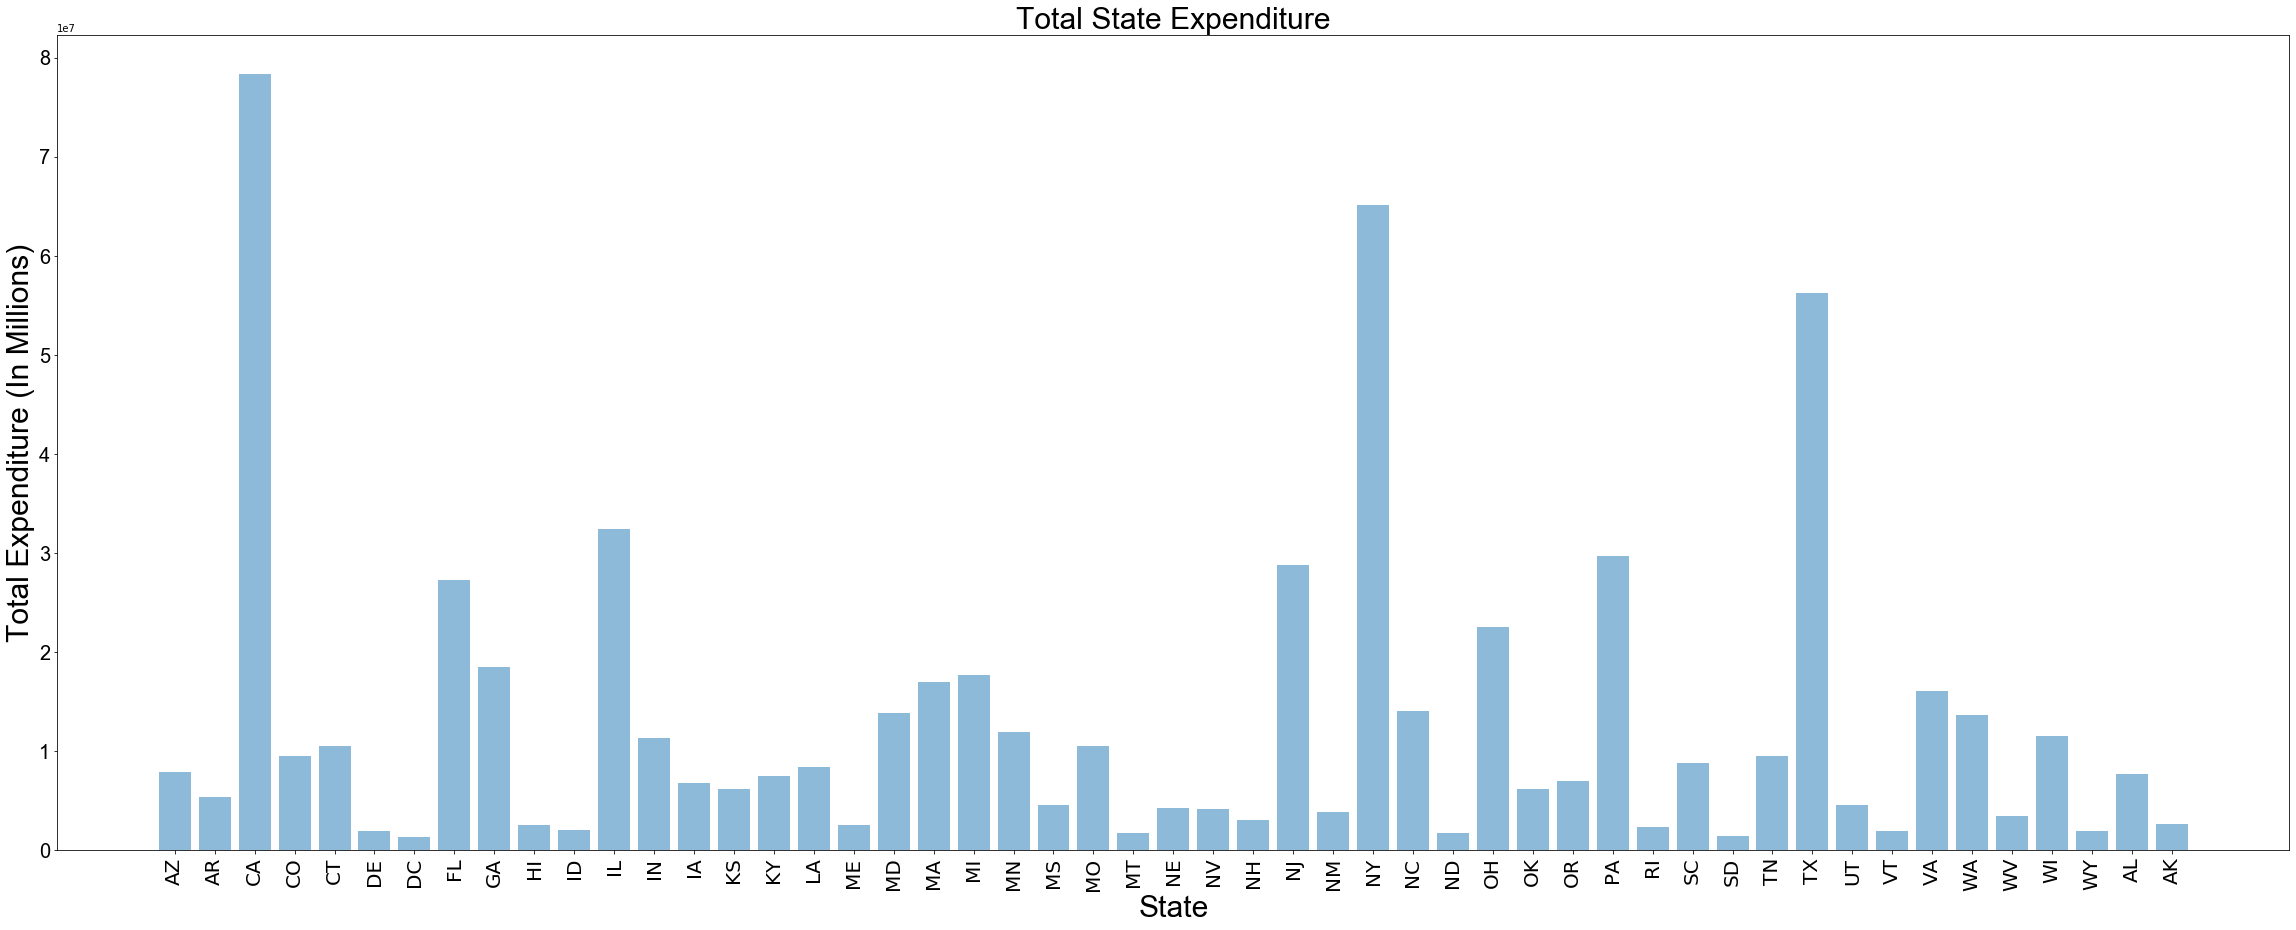

In [5]:
#setting tick locations and setting the length of the x-axis
x_axis = np.arange(len(clean_finance))
tick_locations = [value+0.4 for value in x_axis]
#plotting a bar graph based on total ependiture per state
plt.figure(figsize=(40,15))
plt.bar(clean_finance['STATE'], clean_finance['TOTAL_EXPENDITURE'], alpha=0.5, align="edge")
plt.xticks(tick_locations, clean_finance['STATE'], rotation="90", fontsize=20)
plt.yticks(fontname="Arial", fontsize=20)
plt.title("Total State Expenditure", fontname="Arial", fontsize=30)
plt.xlabel("State", fontname="Arial", fontsize=30)
plt.ylabel("Total Expenditure (In Millions)", fontname="Arial", fontsize=30)
plt.show()

In [10]:
plt.savefig("Images/.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
#cleaning the crime rate data
year_2015 = crime_rates['YEAR']==2015
data_2015 = crime_rates[year_2015]   
data_2015 



crime_percapita = ((data_2015['violent_crime'] + data_2015['burglary'] + data_2015["motor_vehicle_theft"] + data_2015["larceny"])
                   / data_2015['population']) * 100

state_percapita = pd.DataFrame({"STATE" : data_2015['STATE'],
                               "CRIME PER CAPITA" : crime_percapita}) 

state_percapita

In [ ]:
#setting tick locations and setting the length of the x-axis
x_axis = np.arange(len(state_percapita))
tick_locations = [value+0.4 for value in x_axis]
#plotting a bar graph based on total ependiture per state
plt.figure(figsize=(30,15))
plt.bar(state_percapita['STATE'], state_percapita['CRIME PER CAPITA'], alpha=0.5, align="edge")
plt.xticks(tick_locations, clean_finance['STATE'], rotation="90", fontsize=20)
plt.yticks(fontname="Arial", fontsize=20)
plt.title("Crime per Capita", fontname="Arial", fontsize=30)
plt.xlabel("State", fontname="Arial", fontsize=30)
plt.ylabel("Crime Per Capita", fontname="Arial", fontsize=30)
plt.show()

In [ ]:
#the SAT scores came already properly formatted 
SAT_data 

x_axis = np.arange(len(SAT_data))
tick_locations = [value+0.4 for value in x_axis]

# Create a bar chart based off of the group series from before
plt.figure(figsize=(30,15))
plt.bar(SAT_data["State"], SAT_data["Total"], alpha=0.5, align="edge")
plt.xticks(tick_locations, SAT_data["State"], rotation="90", fontsize=20)
plt.yticks(fontname="Arial", fontsize=20)
plt.title("Total SAT Score by State", fontname="Arial", fontsize=30)
plt.xlabel("State", fontname="Arial", fontsize=30)
plt.ylabel("Total Score", fontname="Arial", fontsize=30)
plt.show()

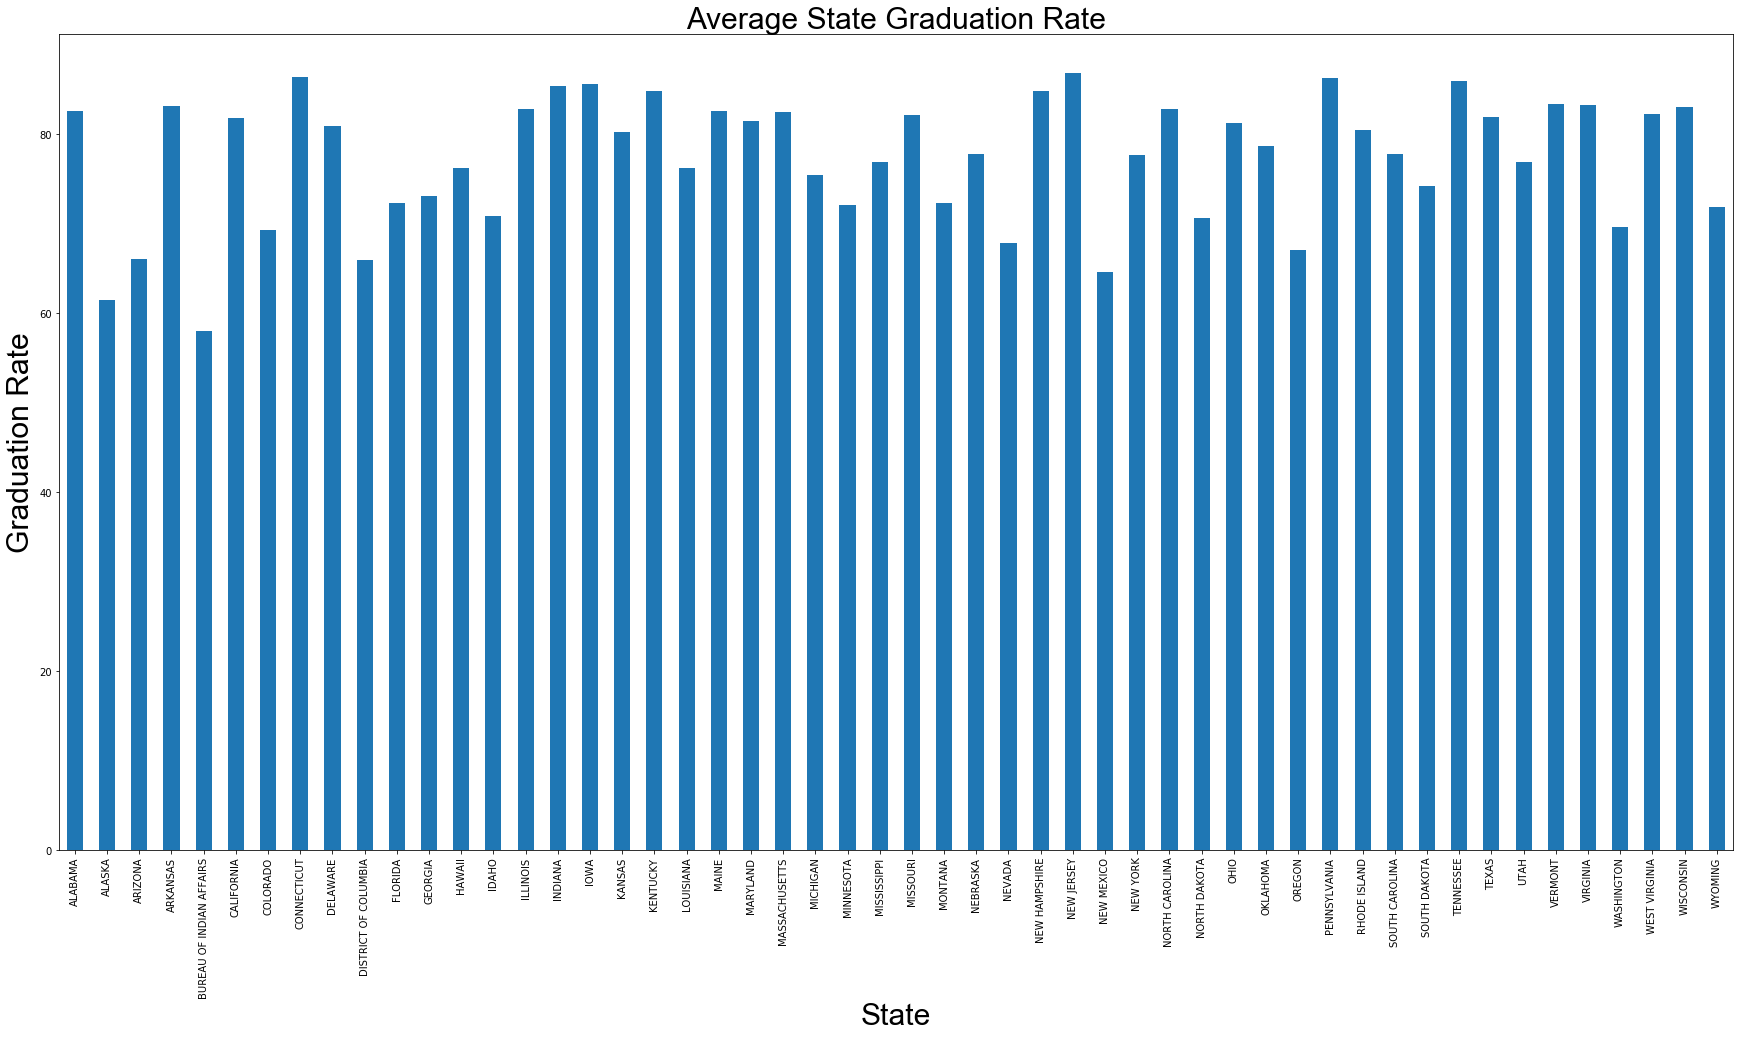

In [7]:
#cleaning the graduation rate data
overall_rates = pd.DataFrame({"States" : grad_rates["STNAM"],
                              "County" : grad_rates["LEANM"], 
                              "School Name" : grad_rates["SCHNAM"], 
                              "Graduation Rate" : grad_rates["ALL_RATE"]})

state_grouped = overall_rates.groupby("States").mean()["Graduation Rate"] 
state_grouped

plt.figure(figsize=(30,15))
grad_rate_chart = state_grouped.plot(kind='bar')
plt.title("Average State Graduation Rate", fontname="Arial", fontsize=30)
plt.xlabel("State", fontname="Arial", fontsize=30)
plt.ylabel("Graduation Rate", fontname="Arial", fontsize=30)
plt.show()

In [8]:
#Tracking GA State Expenditure vs crime rate per capita over time 
#getting the relavent data from finance df
ga_data = finance_data.loc[finance_data['STATE']=='GA'] 
ga_clean = ga_data.iloc[0:26,[1,2,8]] 

#getting relavent data from crime rates
ga_crime = crime_rates.loc[crime_rates['STATE']=='GA'] 
clean_ga_crime = ga_crime.iloc[13:38,[0,1,2,3,10,11,12]]   

#merging the df's based on "YEAR"
merged_ga = pd.merge(ga_clean, clean_ga_crime, on="YEAR")
del merged_ga['STATE_x'] 

merged_ga.head()

 



,YEAR,TOTAL_EXPENDITURE,STATE_y,population,violent_crime,burglary,larceny,motor_vehicle_theft
0,1992,5535942,GA,6751000,49496,97402,246619,38913
1,1993,4647974,GA,6917000,50019,90423,246849,41076
2,1994,6597359,GA,7055000,47103,81406,256208,39312
3,1995,7292267,GA,7201000,47317,76324,264872,43809
4,1996,7934236,GA,7353000,46966,81968,288803,46215


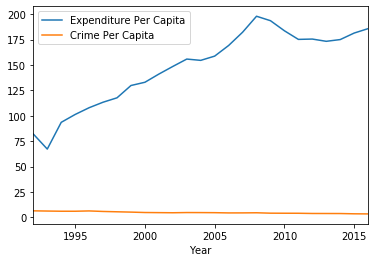

In [9]:
#getting the average "crime per person" for the state of GA
ga_crime_percapita = ((merged_ga['violent_crime'] + merged_ga['burglary'] + merged_ga["motor_vehicle_theft"] + merged_ga["larceny"])
                   / merged_ga['population']) * 100

#calculating state expenditure "per person"
ga_expenditure_percapita = (merged_ga['TOTAL_EXPENDITURE'] / merged_ga['population']) * 100

#create a new df with relavent data
expenditure_vs_crime = pd.DataFrame({'State':merged_ga['STATE_y'],
                                     'Year':merged_ga['YEAR'],
                                     'Expenditure Per Capita':ga_expenditure_percapita,
                                     'Crime Per Capita':ga_crime_percapita})
del expenditure_vs_crime['State'] 
ga_index = expenditure_vs_crime.set_index("Year")

#line plot
ga_index.plot()

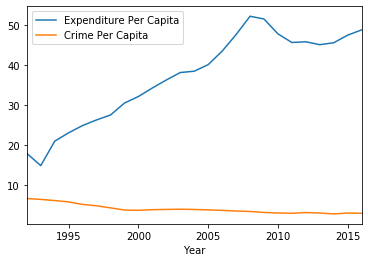

In [48]:
#California expenditure vs crime per capita
ca_data = finance_data.loc[finance_data['STATE']=='CA'] 
ca_clean = ga_data.iloc[0:26,[1,2,8]] 

#getting relavent data from crime rates
ca_crime = crime_rates.loc[crime_rates['STATE']=='CA'] 
clean_ca_crime = ca_crime.iloc[13:38,[0,1,2,3,10,11,12]]   

#merging the df's based on "YEAR"
merged_ca = pd.merge(ca_clean, clean_ca_crime, on="YEAR")
del merged_ca['STATE_x'] 

#getting the average "crime per person" for the state of CA
ca_crime_percapita = ((merged_ca['violent_crime'] + merged_ca['burglary'] + merged_ca["motor_vehicle_theft"] + merged_ca["larceny"])
                   / merged_ca['population']) * 100

#calculating state expenditure "per person"
ca_expenditure_percapita = (merged_ca['TOTAL_EXPENDITURE'] / merged_ca['population']) * 100

#create a new df with relavent data
expenditure_vs_crime = pd.DataFrame({'State':merged_ca['STATE_y'],
                                     'Year':merged_ca['YEAR'],
                                     'Expenditure Per Capita':ca_expenditure_percapita,
                                     'Crime Per Capita':ca_crime_percapita})
del expenditure_vs_crime['State'] 
ca_index = expenditure_vs_crime.set_index("Year")

#line plot
ca_index.plot() 

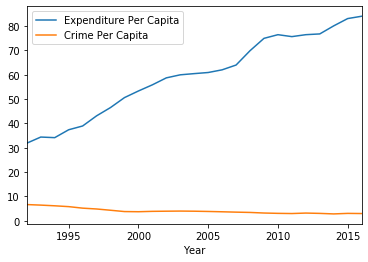

In [49]:
#Illinois expenditure vs crime per capita
il_data = finance_data.loc[finance_data['STATE']=='IL'] 
il_clean = il_data.iloc[0:26,[1,2,8]] 

#getting relavent data from crime rates
il_crime = crime_rates.loc[crime_rates['STATE']=='IL'] 
clean_il_crime = ca_crime.iloc[13:38,[0,1,2,3,10,11,12]]   

#merging the df's based on "YEAR"
merged_il = pd.merge(il_clean, clean_il_crime, on="YEAR")
del merged_il['STATE_x'] 

#getting the average "crime per person" for the state of IL
il_crime_percapita = ((merged_il['violent_crime'] + merged_il['burglary'] + merged_il["motor_vehicle_theft"] + merged_il["larceny"])
                   / merged_il['population']) * 100

#calculating state expenditure "per person"
il_expenditure_percapita = (merged_il['TOTAL_EXPENDITURE'] / merged_il['population']) * 100

#create a new df with relavent data
expenditure_vs_crime = pd.DataFrame({'State':merged_il['STATE_y'],
                                     'Year':merged_il['YEAR'],
                                     'Expenditure Per Capita':il_expenditure_percapita,
                                     'Crime Per Capita':il_crime_percapita})
del expenditure_vs_crime['State'] 
il_index = expenditure_vs_crime.set_index("Year")

#line plot
il_index.plot()

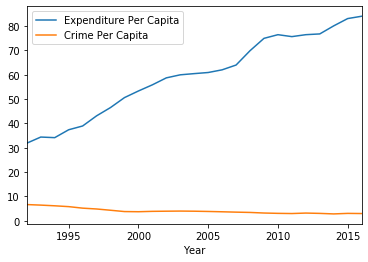

In [50]:
#New York expenditure vs crime per capita
ny_data = finance_data.loc[finance_data['STATE']=='NY'] 
ny_clean = ny_data.iloc[0:26,[1,2,8]] 

#getting relavent data from crime rates
ny_crime = crime_rates.loc[crime_rates['STATE']=='NY'] 
clean_ny_crime = ca_crime.iloc[13:38,[0,1,2,3,10,11,12]]   

#merging the df's based on "YEAR"
merged_ny = pd.merge(ny_clean, clean_ny_crime, on="YEAR")
del merged_ny['STATE_x'] 

#getting the average "crime per person" for the state of ny
ny_crime_percapita = ((merged_ny['violent_crime'] + merged_ny['burglary'] + merged_ny["motor_vehicle_theft"] + merged_ny["larceny"])
                   / merged_ny['population']) * 100

#calculating state expenditure "per person"
ny_expenditure_percapita = (merged_ny['TOTAL_EXPENDITURE'] / merged_ny['population']) * 100

#create a new df with relavent data
expenditure_vs_crime = pd.DataFrame({'State':merged_ny['STATE_y'],
                                     'Year':merged_ny['YEAR'],
                                     'Expenditure Per Capita':il_expenditure_percapita,
                                     'Crime Per Capita':il_crime_percapita})
del expenditure_vs_crime['State'] 
ny_index = expenditure_vs_crime.set_index("Year")

#line plot
ny_index.plot()